Backtesting: 2020-01-01 00:00:00 to 2025-01-01 00:00:00

Test split: 2020-01-02 00:00:00 to 2024-12-31 00:00:00


  0% (0 of 1212) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (21 of 1212) |                      | Elapsed Time: 0:00:00 ETA:   0:00:02
  5% (71 of 1212) |#                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 15% (191 of 1212) |###                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 25% (311 of 1212) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 34% (421 of 1212) |#######              | Elapsed Time: 0:00:00 ETA:   0:00:00
 43% (531 of 1212) |#########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 56% (681 of 1212) |###########          | Elapsed Time: 0:00:00 ETA:   0:00:00
 67% (821 of 1212) |##############       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (991 of 1212) |#################    | Elapsed Time: 0:00:00 ETA:   0:00:00
 91% (1111 of 1212) |##################  | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (1212 of 1212) |####################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:01
Empty DataFrame
Columns: [type, symbol, entry_date, exit_date, entry, exit, shares, pnl, return_pct, agg_pnl, bars, pnl_per_bar, stop, mae, mfe]
Index: []


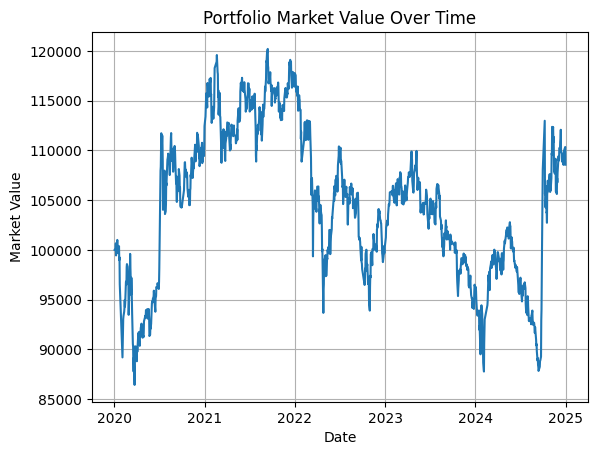

In [11]:
from pybroker import Strategy
import pandas as pd
import matplotlib.pyplot as plt


# Load your CSV data
df = pd.read_csv('./data/sh000001.csv', parse_dates=['date'])
df['symbol'] = 'SH000001'

# Create Strategy
strategy = Strategy(
    data_source=df,
    start_date='2020-01-01',
    end_date='2025-01-01'
    )

# Example execution function
def exec_fn(ctx):
    if not ctx.long_pos():
        ctx.buy_shares = 100

# Add execution logic
strategy.add_execution(exec_fn, ['SH000001'])

# Run backtest
result = strategy.backtest()


print(result.trades)

# Plot the portfolio's market value over time
plt.plot(result.portfolio.index, result.portfolio['market_value'])
plt.title('Portfolio Market Value Over Time')
plt.xlabel('Date')
plt.ylabel('Market Value')
plt.grid(True)
plt.show()
